In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "low_z"
key = "lambda"
quantile = "2"


In [3]:
shape_cat="mcal"
vol="all"
z_range="all_z"
key="lambda"
quantile="1"

In [4]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [5]:
if quantile!="":
    i=int(quantile)

In [6]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [7]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [8]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [9]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [10]:
NBINS=10

In [11]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [12]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [13]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [14]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [15]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [16]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  3.91it/s]

13it [00:00,  5.51it/s]

25it [00:00,  7.73it/s]

37it [00:00, 10.74it/s]

50it [00:00, 14.79it/s]

63it [00:00, 20.08it/s]

76it [00:00, 26.81it/s]

89it [00:00, 35.02it/s]

101it [00:01, 44.42it/s]

113it [00:01, 54.73it/s]

125it [00:01, 65.39it/s]

138it [00:01, 74.78it/s]

150it [00:01, 79.11it/s]

162it [00:01, 88.01it/s]

174it [00:01, 94.49it/s]

187it [00:01, 101.22it/s]

199it [00:01, 101.88it/s]

211it [00:02, 97.64it/s] 

222it [00:02, 98.51it/s]

234it [00:02, 103.71it/s]

246it [00:02, 107.20it/s]

259it [00:02, 111.24it/s]

271it [00:02, 110.78it/s]

283it [00:02, 113.22it/s]

296it [00:02, 115.83it/s]

309it [00:02, 117.37it/s]

321it [00:03, 114.70it/s]

333it [00:03, 113.60it/s]

346it [00:03, 116.05it/s]

359it [00:03, 118.39it/s]

372it [00:03, 119.37it/s]

385it [00:03, 120.45it/s]

398it [00:03, 121.61it/s]

411it [00:03, 121.60it/s]

424it [00:03, 121.40it/s]

437it [00:04, 121.07it/s]

450it [00:04, 121.39it/s]

463it [00:04, 120.38it/s]

476it [00:04, 118.25it/s]

488it [00:04, 118.63it/s]

501it [00:04, 119.39it/s]

513it [00:04, 119.47it/s]

526it [00:04, 120.46it/s]

539it [00:04, 121.00it/s]

552it [00:04, 113.04it/s]

564it [00:05, 97.70it/s] 

575it [00:05, 100.33it/s]

588it [00:05, 106.06it/s]

601it [00:05, 110.97it/s]

614it [00:05, 114.28it/s]

626it [00:05, 114.00it/s]

638it [00:05, 114.72it/s]

650it [00:05, 116.08it/s]

662it [00:05, 117.04it/s]

674it [00:06, 113.08it/s]

686it [00:06, 109.13it/s]

698it [00:06, 110.08it/s]

710it [00:06, 110.75it/s]

722it [00:06, 111.91it/s]

734it [00:06, 104.44it/s]

745it [00:06, 91.83it/s] 

757it [00:06, 98.59it/s]

770it [00:07, 104.03it/s]

783it [00:07, 108.74it/s]

795it [00:07, 111.84it/s]

807it [00:07, 111.00it/s]

820it [00:07, 114.26it/s]

833it [00:07, 116.69it/s]

845it [00:07, 116.26it/s]

858it [00:07, 118.08it/s]

871it [00:07, 118.89it/s]

884it [00:07, 120.32it/s]

897it [00:08, 121.27it/s]

910it [00:08, 118.38it/s]

923it [00:08, 119.76it/s]

936it [00:08, 120.46it/s]

949it [00:08, 120.68it/s]

962it [00:08, 121.48it/s]

975it [00:08, 122.34it/s]

988it [00:08, 121.51it/s]

1001it [00:09, 105.37it/s]

1012it [00:09, 106.48it/s]

1024it [00:09, 110.07it/s]

1037it [00:09, 113.16it/s]

1050it [00:09, 115.08it/s]

1063it [00:09, 116.80it/s]

1076it [00:09, 118.25it/s]

1089it [00:09, 118.85it/s]

1101it [00:09, 110.82it/s]

1114it [00:09, 114.12it/s]

1127it [00:10, 116.55it/s]

1139it [00:10, 117.22it/s]

1152it [00:10, 118.89it/s]

1165it [00:10, 119.90it/s]

1178it [00:10, 114.93it/s]

1190it [00:10, 116.20it/s]

1203it [00:10, 117.99it/s]

1216it [00:10, 119.64it/s]

1229it [00:10, 119.25it/s]

1242it [00:11, 120.42it/s]

1255it [00:11, 120.78it/s]

1268it [00:11, 119.29it/s]

1281it [00:11, 116.87it/s]

1293it [00:11, 112.16it/s]

1305it [00:11, 111.54it/s]

1318it [00:11, 114.50it/s]

1331it [00:11, 117.16it/s]

1343it [00:11, 116.63it/s]

1356it [00:12, 118.41it/s]

1369it [00:12, 119.25it/s]

1381it [00:12, 119.19it/s]

1394it [00:12, 116.16it/s]

1406it [00:12, 111.37it/s]

1419it [00:12, 114.03it/s]

1431it [00:12, 101.24it/s]

1442it [00:12, 92.86it/s] 

1452it [00:12, 90.69it/s]

1464it [00:13, 96.28it/s]

1476it [00:13, 100.66it/s]

1487it [00:13, 101.19it/s]

1499it [00:13, 105.96it/s]

1512it [00:13, 110.23it/s]

1525it [00:13, 113.37it/s]

1537it [00:13, 98.97it/s] 

1549it [00:13, 102.96it/s]

1561it [00:13, 106.85it/s]

1572it [00:14, 102.64it/s]

1583it [00:14, 95.51it/s] 

1593it [00:14, 93.90it/s]

1604it [00:14, 96.81it/s]

1615it [00:14, 99.61it/s]

1628it [00:14, 105.12it/s]

1640it [00:14, 108.87it/s]

1653it [00:14, 112.65it/s]

1666it [00:14, 115.80it/s]

1678it [00:15, 116.96it/s]

1691it [00:15, 118.52it/s]

1703it [00:15, 118.94it/s]

1716it [00:15, 118.88it/s]

1729it [00:15, 119.63it/s]

1742it [00:15, 119.94it/s]

1755it [00:15, 120.08it/s]

1768it [00:15, 120.46it/s]

1781it [00:15, 119.79it/s]

1793it [00:16, 115.32it/s]

1805it [00:16, 110.42it/s]

1818it [00:16, 113.36it/s]

1830it [00:16, 111.72it/s]

1842it [00:16, 109.37it/s]

1855it [00:16, 112.67it/s]

1867it [00:16, 114.59it/s]

1879it [00:16, 115.42it/s]

1892it [00:16, 116.89it/s]

1904it [00:17, 117.69it/s]

1917it [00:17, 118.37it/s]

1930it [00:17, 119.43it/s]

1942it [00:17, 118.59it/s]

1954it [00:17, 114.40it/s]

1967it [00:17, 116.38it/s]

1980it [00:17, 118.49it/s]

1993it [00:17, 120.40it/s]

2006it [00:17, 107.80it/s]

2019it [00:18, 111.40it/s]

2032it [00:18, 114.14it/s]

2045it [00:18, 113.68it/s]

2057it [00:18, 107.48it/s]

2068it [00:18, 106.16it/s]

2080it [00:18, 107.50it/s]

2092it [00:18, 110.71it/s]

2105it [00:18, 113.42it/s]

2118it [00:18, 115.46it/s]

2130it [00:19, 116.76it/s]

2142it [00:19, 116.39it/s]

2154it [00:19, 116.97it/s]

2166it [00:19, 116.31it/s]

2178it [00:19, 115.93it/s]

2190it [00:19, 116.30it/s]

2202it [00:19, 116.39it/s]

2214it [00:19, 112.76it/s]

2226it [00:19, 114.38it/s]

2239it [00:19, 117.37it/s]

2252it [00:20, 116.06it/s]

2264it [00:20, 114.13it/s]

2277it [00:20, 117.00it/s]

2290it [00:20, 118.26it/s]

2303it [00:20, 119.54it/s]

2316it [00:20, 120.33it/s]

2329it [00:20, 120.14it/s]

2342it [00:20, 119.48it/s]

2354it [00:20, 119.49it/s]

2367it [00:21, 119.83it/s]

2379it [00:21, 116.85it/s]

2391it [00:21, 115.05it/s]

2404it [00:21, 117.59it/s]

2417it [00:21, 119.27it/s]

2429it [00:21, 117.82it/s]

2441it [00:21, 117.98it/s]

2453it [00:21, 118.14it/s]

2465it [00:21, 101.90it/s]

2477it [00:22, 105.88it/s]

2490it [00:22, 110.43it/s]

2502it [00:22, 112.60it/s]

2515it [00:22, 115.37it/s]

2527it [00:22, 116.21it/s]

2540it [00:22, 117.41it/s]

2553it [00:22, 118.79it/s]

2566it [00:22, 119.85it/s]

2579it [00:22, 118.75it/s]

2591it [00:23, 103.14it/s]

2602it [00:23, 95.26it/s] 

2613it [00:23, 98.63it/s]

2624it [00:23, 97.31it/s]

2636it [00:23, 103.07it/s]

2648it [00:23, 106.87it/s]

2661it [00:23, 110.22it/s]

2673it [00:23, 112.33it/s]

2685it [00:23, 113.94it/s]

2697it [00:23, 114.35it/s]

2709it [00:24, 114.65it/s]

2721it [00:24, 99.66it/s] 

2734it [00:24, 105.09it/s]

2747it [00:24, 109.56it/s]

2759it [00:24, 111.96it/s]

2772it [00:24, 115.18it/s]

2784it [00:24, 115.73it/s]

2796it [00:24, 102.05it/s]

2807it [00:25, 102.21it/s]

2818it [00:25, 101.61it/s]

2830it [00:25, 106.23it/s]

2842it [00:25, 109.89it/s]

2854it [00:25, 112.35it/s]

2867it [00:25, 114.75it/s]

2880it [00:25, 116.43it/s]

2893it [00:25, 117.82it/s]

2905it [00:25, 118.33it/s]

2917it [00:25, 115.66it/s]

2930it [00:26, 117.26it/s]

2942it [00:26, 105.22it/s]

2953it [00:26, 94.04it/s] 

2964it [00:26, 96.67it/s]

2977it [00:26, 102.86it/s]

2990it [00:26, 107.91it/s]

3003it [00:26, 111.49it/s]

3016it [00:26, 114.17it/s]

3028it [00:27, 114.80it/s]

3040it [00:27, 114.73it/s]

3053it [00:27, 116.51it/s]

3066it [00:27, 117.69it/s]

3078it [00:27, 117.05it/s]

3090it [00:27, 96.80it/s] 

3101it [00:27, 89.25it/s]

3111it [00:27, 86.62it/s]

3121it [00:27, 84.93it/s]

3132it [00:28, 90.39it/s]

3144it [00:28, 97.33it/s]

3155it [00:28, 96.72it/s]

3165it [00:28, 92.58it/s]

3175it [00:28, 86.29it/s]

3186it [00:28, 90.31it/s]

3198it [00:28, 96.85it/s]

3210it [00:28, 101.47it/s]

3222it [00:28, 105.87it/s]

3233it [00:29, 95.81it/s] 

3243it [00:29, 85.08it/s]

3254it [00:29, 91.05it/s]

3267it [00:29, 98.12it/s]

3278it [00:29, 97.50it/s]

3289it [00:29, 92.16it/s]

3299it [00:29, 86.10it/s]

3311it [00:29, 94.06it/s]

3323it [00:30, 99.92it/s]

3336it [00:30, 105.74it/s]

3349it [00:30, 110.16it/s]

3361it [00:30, 110.75it/s]

3373it [00:30, 113.14it/s]

3385it [00:30, 114.51it/s]

3398it [00:30, 116.84it/s]

3411it [00:30, 117.20it/s]

3423it [00:30, 112.83it/s]

3435it [00:31, 114.13it/s]

3447it [00:31, 115.55it/s]

3459it [00:31, 116.51it/s]

3472it [00:31, 118.01it/s]

3484it [00:31, 111.24it/s]

3496it [00:31, 112.51it/s]

3508it [00:31, 110.19it/s]

3520it [00:31, 112.53it/s]

3532it [00:31, 114.15it/s]

3544it [00:31, 114.76it/s]

3556it [00:32, 114.90it/s]

3568it [00:32, 115.75it/s]

3580it [00:32, 116.68it/s]

3593it [00:32, 119.28it/s]

3605it [00:32, 119.32it/s]

3617it [00:32, 119.43it/s]

3630it [00:32, 119.84it/s]

3643it [00:32, 120.04it/s]

3656it [00:32, 119.35it/s]

3668it [00:33, 119.28it/s]

3681it [00:33, 119.81it/s]

3694it [00:33, 120.44it/s]

3707it [00:33, 101.37it/s]

3719it [00:33, 105.49it/s]

3731it [00:33, 108.73it/s]

3744it [00:33, 112.26it/s]

3757it [00:33, 114.54it/s]

3769it [00:33, 112.28it/s]

3781it [00:34, 113.53it/s]

3793it [00:34, 99.54it/s] 

3804it [00:34, 93.77it/s]

3815it [00:34, 97.43it/s]

3827it [00:34, 101.87it/s]

3839it [00:34, 106.06it/s]

3852it [00:34, 110.06it/s]

3864it [00:34, 112.83it/s]

3876it [00:34, 110.30it/s]

3888it [00:35, 110.29it/s]

3900it [00:35, 112.20it/s]

3912it [00:35, 113.16it/s]

3924it [00:35, 114.19it/s]

3936it [00:35, 114.20it/s]

3948it [00:35, 114.18it/s]

3960it [00:35, 114.24it/s]

3972it [00:35, 110.20it/s]

3985it [00:35, 113.12it/s]

3997it [00:36, 113.55it/s]

4009it [00:36, 113.84it/s]

4021it [00:36, 114.01it/s]

4033it [00:36, 115.24it/s]

4046it [00:36, 116.56it/s]

4058it [00:36, 101.45it/s]

4069it [00:36, 94.10it/s] 

4079it [00:36, 90.10it/s]

4089it [00:36, 85.97it/s]

4099it [00:37, 89.72it/s]

4112it [00:37, 97.64it/s]

4123it [00:37, 91.74it/s]

4135it [00:37, 97.75it/s]

4147it [00:37, 102.42it/s]

4158it [00:37, 110.48it/s]

0it [00:00, ?it/s]

8it [00:00, 78.73it/s]

Number of empty sat catalogs is 2


21it [00:00, 88.26it/s]

29it [00:00, 84.24it/s]

37it [00:00, 81.96it/s]

46it [00:00, 83.75it/s]

55it [00:00, 84.66it/s]

64it [00:00, 85.25it/s]

72it [00:00, 78.58it/s]

81it [00:00, 81.02it/s]

93it [00:01, 88.36it/s]

106it [00:01, 97.60it/s]

120it [00:01, 105.61it/s]

134it [00:01, 111.83it/s]

147it [00:01, 114.90it/s]

160it [00:01, 118.36it/s]

174it [00:01, 121.76it/s]

187it [00:01, 119.91it/s]

200it [00:01, 119.57it/s]

213it [00:02, 118.48it/s]

225it [00:02, 118.35it/s]

237it [00:02, 114.40it/s]

249it [00:02, 102.22it/s]

260it [00:02, 90.60it/s] 

270it [00:02, 89.16it/s]

283it [00:02, 98.10it/s]

296it [00:02, 104.50it/s]

307it [00:02, 98.86it/s] 

318it [00:03, 100.53it/s]

330it [00:03, 104.59it/s]

342it [00:03, 107.98it/s]

353it [00:03, 107.54it/s]

365it [00:03, 109.97it/s]

377it [00:03, 112.06it/s]

389it [00:03, 114.23it/s]

401it [00:03, 113.85it/s]

414it [00:03, 117.93it/s]

426it [00:04, 114.71it/s]

439it [00:04, 118.59it/s]

452it [00:04, 119.46it/s]

465it [00:04, 122.15it/s]

478it [00:04, 119.28it/s]

490it [00:04, 118.87it/s]

502it [00:04, 104.70it/s]

513it [00:04, 104.87it/s]

526it [00:04, 109.21it/s]

539it [00:05, 112.51it/s]

551it [00:05, 113.66it/s]

563it [00:05, 113.36it/s]

575it [00:05, 100.47it/s]

586it [00:05, 92.81it/s] 

599it [00:05, 100.16it/s]

612it [00:05, 105.88it/s]

623it [00:05, 106.66it/s]

636it [00:05, 110.54it/s]

649it [00:06, 113.56it/s]

661it [00:06, 113.00it/s]

674it [00:06, 116.59it/s]

687it [00:06, 120.14it/s]

700it [00:06, 116.90it/s]

712it [00:06, 88.82it/s] 

725it [00:06, 97.92it/s]

738it [00:06, 105.42it/s]

752it [00:06, 111.76it/s]

765it [00:07, 115.79it/s]

778it [00:07, 115.49it/s]

790it [00:07, 114.46it/s]

802it [00:07, 114.95it/s]

814it [00:07, 115.38it/s]

826it [00:07, 114.10it/s]

839it [00:07, 117.75it/s]

853it [00:07, 121.13it/s]

866it [00:07, 123.37it/s]

879it [00:08, 124.75it/s]

893it [00:08, 126.54it/s]

906it [00:08, 125.18it/s]

919it [00:08, 124.90it/s]

932it [00:08, 124.64it/s]

945it [00:08, 125.66it/s]

958it [00:08, 125.31it/s]

971it [00:08, 116.89it/s]

983it [00:08, 116.13it/s]

996it [00:09, 119.40it/s]

1010it [00:09, 122.86it/s]

1023it [00:09, 120.18it/s]

1037it [00:09, 122.94it/s]

1050it [00:09, 120.42it/s]

1063it [00:09, 120.66it/s]

1076it [00:09, 123.22it/s]

1089it [00:09, 122.57it/s]

1102it [00:09, 105.30it/s]

1115it [00:10, 110.29it/s]

1128it [00:10, 114.66it/s]

1141it [00:10, 113.79it/s]

1154it [00:10, 116.59it/s]

1166it [00:10, 116.95it/s]

1179it [00:10, 119.09it/s]

1192it [00:10, 121.33it/s]

1205it [00:10, 123.53it/s]

1218it [00:10, 113.29it/s]

1231it [00:11, 116.77it/s]

1243it [00:11, 117.05it/s]

1257it [00:11, 120.94it/s]

1270it [00:11, 123.07it/s]

1283it [00:11, 122.74it/s]

1296it [00:11, 123.86it/s]

1309it [00:11, 109.29it/s]

1321it [00:11, 108.87it/s]

1335it [00:11, 114.65it/s]

1348it [00:11, 118.29it/s]

1362it [00:12, 122.04it/s]

1376it [00:12, 124.90it/s]

1390it [00:12, 126.56it/s]

1403it [00:12, 127.57it/s]

1416it [00:12, 122.73it/s]

1429it [00:12, 118.65it/s]

1442it [00:12, 121.12it/s]

1455it [00:12, 113.50it/s]

1467it [00:13, 103.90it/s]

1478it [00:13, 98.83it/s] 

1489it [00:13, 88.94it/s]

1499it [00:13, 89.03it/s]

1509it [00:13, 81.05it/s]

1520it [00:13, 87.81it/s]

1530it [00:13, 84.63it/s]

1540it [00:13, 88.60it/s]

1553it [00:13, 97.56it/s]

1567it [00:14, 106.46it/s]

1580it [00:14, 112.24it/s]

1594it [00:14, 117.34it/s]

1607it [00:14, 120.55it/s]

1620it [00:14, 120.03it/s]

1633it [00:14, 116.99it/s]

1645it [00:14, 117.01it/s]

1657it [00:14, 115.32it/s]

1670it [00:14, 117.87it/s]

1683it [00:15, 120.02it/s]

1696it [00:15, 121.88it/s]

1709it [00:15, 119.27it/s]

1723it [00:15, 122.52it/s]

1736it [00:15, 115.79it/s]

1748it [00:15, 116.03it/s]

1761it [00:15, 118.90it/s]

1774it [00:15, 121.33it/s]

1787it [00:15, 117.71it/s]

1799it [00:16, 116.84it/s]

1812it [00:16, 119.61it/s]

1825it [00:16, 118.81it/s]

1838it [00:16, 119.91it/s]

1851it [00:16, 104.85it/s]

1862it [00:16, 99.00it/s] 

1873it [00:16, 95.36it/s]

1887it [00:16, 103.87it/s]

1900it [00:16, 110.26it/s]

1914it [00:17, 115.81it/s]

1927it [00:17, 117.39it/s]

1939it [00:17, 105.28it/s]

1952it [00:17, 110.86it/s]

1965it [00:17, 114.99it/s]

1979it [00:17, 119.40it/s]

1992it [00:17, 122.26it/s]

2005it [00:17, 122.30it/s]

2018it [00:17, 117.66it/s]

2031it [00:18, 120.68it/s]

2045it [00:18, 123.42it/s]

2058it [00:18, 124.94it/s]

2072it [00:18, 126.87it/s]

2086it [00:18, 128.24it/s]

2099it [00:18, 123.17it/s]

2112it [00:18, 123.86it/s]

2125it [00:18, 125.64it/s]

2138it [00:18, 125.82it/s]

2151it [00:19, 126.19it/s]

2165it [00:19, 127.95it/s]

2179it [00:19, 128.79it/s]

2192it [00:19, 117.63it/s]

2204it [00:19, 116.91it/s]

2217it [00:19, 119.53it/s]

2230it [00:19, 122.23it/s]

2243it [00:19, 123.67it/s]

2256it [00:19, 124.42it/s]

2269it [00:19, 125.57it/s]

2282it [00:20, 125.91it/s]

2295it [00:20, 127.01it/s]

2308it [00:20, 127.01it/s]

2321it [00:20, 127.55it/s]

2334it [00:20, 127.26it/s]

2347it [00:20, 127.38it/s]

2360it [00:20, 127.48it/s]

2373it [00:20, 127.17it/s]

2386it [00:20, 126.37it/s]

2399it [00:21, 120.36it/s]

2412it [00:21, 101.81it/s]

2423it [00:21, 92.36it/s] 

2436it [00:21, 101.13it/s]

2449it [00:21, 107.48it/s]

2462it [00:21, 111.38it/s]

2475it [00:21, 115.09it/s]

2488it [00:21, 119.10it/s]

2501it [00:21, 121.81it/s]

2514it [00:22, 123.92it/s]

2527it [00:22, 125.44it/s]

2540it [00:22, 126.57it/s]

2554it [00:22, 127.83it/s]

2567it [00:22, 111.52it/s]

2579it [00:22, 102.62it/s]

2590it [00:22, 97.63it/s] 

2601it [00:22, 93.60it/s]

2611it [00:23, 91.00it/s]

2621it [00:23, 90.31it/s]

2631it [00:23, 91.73it/s]

2644it [00:23, 99.70it/s]

2655it [00:23, 89.93it/s]

2668it [00:23, 98.26it/s]

2679it [00:23, 92.96it/s]

2689it [00:23, 82.35it/s]

2701it [00:23, 89.89it/s]

2714it [00:24, 99.01it/s]

2727it [00:24, 106.57it/s]

2740it [00:24, 112.66it/s]

2753it [00:24, 117.03it/s]

2767it [00:24, 121.18it/s]

2780it [00:24, 115.29it/s]

2793it [00:24, 117.98it/s]

2806it [00:24, 121.06it/s]

2820it [00:24, 123.52it/s]

2833it [00:25, 110.64it/s]

2845it [00:25, 112.04it/s]

2858it [00:25, 115.61it/s]

2871it [00:25, 118.00it/s]

2884it [00:25, 120.73it/s]

2897it [00:25, 123.02it/s]

2910it [00:25, 125.02it/s]

2923it [00:25, 125.27it/s]

2936it [00:25, 125.29it/s]

2949it [00:26, 118.95it/s]

2962it [00:26, 120.70it/s]

2975it [00:26, 121.99it/s]

2988it [00:26, 114.69it/s]

3000it [00:26, 110.76it/s]

3013it [00:26, 114.04it/s]

3026it [00:26, 117.06it/s]

3038it [00:26, 103.35it/s]

3051it [00:26, 109.16it/s]

3063it [00:27, 111.97it/s]

3075it [00:27, 110.87it/s]

3088it [00:27, 115.57it/s]

3102it [00:27, 119.87it/s]

3116it [00:27, 123.24it/s]

3129it [00:27, 121.98it/s]

3142it [00:27, 123.26it/s]

3155it [00:27, 124.25it/s]

3168it [00:27, 107.30it/s]

3180it [00:28, 99.31it/s] 

3193it [00:28, 105.72it/s]

3206it [00:28, 111.23it/s]

3219it [00:28, 115.45it/s]

3232it [00:28, 119.43it/s]

3245it [00:28, 121.10it/s]

3258it [00:28, 103.93it/s]

3269it [00:28, 93.90it/s] 

3279it [00:29, 89.34it/s]

3292it [00:29, 98.30it/s]

3306it [00:29, 105.94it/s]

3319it [00:29, 111.05it/s]

3332it [00:29, 115.97it/s]

3344it [00:29, 112.42it/s]

3357it [00:29, 116.63it/s]

3370it [00:29, 118.63it/s]

3383it [00:29, 120.04it/s]

3396it [00:29, 121.18it/s]

3409it [00:30, 122.97it/s]

3422it [00:30, 124.28it/s]

3435it [00:30, 124.89it/s]

3448it [00:30, 126.02it/s]

3462it [00:30, 127.03it/s]

3475it [00:30, 127.34it/s]

3488it [00:30, 111.28it/s]

3501it [00:30, 113.98it/s]

3514it [00:30, 117.92it/s]

3527it [00:31, 117.11it/s]

3540it [00:31, 118.92it/s]

3553it [00:31, 120.44it/s]

3566it [00:31, 121.89it/s]

3579it [00:31, 122.76it/s]

3592it [00:31, 123.42it/s]

3605it [00:31, 124.40it/s]

3618it [00:31, 119.77it/s]

3631it [00:31, 116.83it/s]

3644it [00:32, 118.48it/s]

3656it [00:32, 117.43it/s]

3670it [00:32, 121.65it/s]

3683it [00:32, 122.63it/s]

3697it [00:32, 125.23it/s]

3710it [00:32, 125.91it/s]

3723it [00:32, 125.73it/s]

3736it [00:32, 126.84it/s]

3749it [00:32, 125.75it/s]

3763it [00:32, 127.76it/s]

3776it [00:33, 126.76it/s]

3789it [00:33, 126.83it/s]

3802it [00:33, 126.14it/s]

3815it [00:33, 126.63it/s]

3828it [00:33, 125.01it/s]

3841it [00:33, 119.12it/s]

3854it [00:33, 121.93it/s]

3867it [00:33, 122.56it/s]

3880it [00:33, 121.80it/s]

3894it [00:34, 124.76it/s]

3907it [00:34, 110.14it/s]

3919it [00:34, 102.97it/s]

3932it [00:34, 109.02it/s]

3945it [00:34, 114.56it/s]

3957it [00:34, 112.54it/s]

3969it [00:34, 112.75it/s]

3982it [00:34, 117.22it/s]

3995it [00:34, 120.39it/s]

4008it [00:35, 123.03it/s]

4022it [00:35, 124.83it/s]

4035it [00:35, 125.37it/s]

4048it [00:35, 110.99it/s]

4060it [00:35, 97.45it/s] 

4072it [00:35, 102.99it/s]

4086it [00:35, 110.05it/s]

4100it [00:35, 115.40it/s]

4114it [00:35, 119.82it/s]

4127it [00:36, 118.81it/s]

4140it [00:36, 121.72it/s]

4153it [00:36, 122.06it/s]

4158it [00:36, 114.45it/s]

Number of empty sat catalogs is 2


In [17]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [18]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [19]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [20]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [21]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [22]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [23]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [24]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [25]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

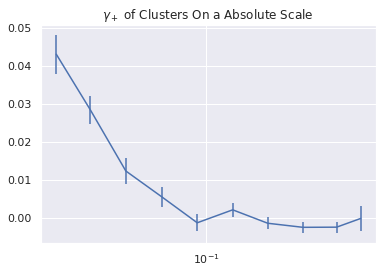

Aggregated xi:
[-21.7531 -30.1585 -19.9945 -14.8264   5.5317 -14.7462  14.2525  32.3391
  28.4561   0.2693]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -2184.938   -4104.5337  -5482.1475  -7775.8824 -10446.6981 -13459.7294
 -14821.425  -12922.3774  -6241.5773   -377.9867]
------------------------------------------------------------------------------
Aggregated npairs:
[  505.  1062.  1619.  2683.  4317.  6937. 10112. 13052. 11666.  1806.]
------------------------------------------------------------------------------
Mean xi:
[-0.0431 -0.0284 -0.0123 -0.0055  0.0013 -0.0021  0.0014  0.0025  0.0024
  0.0001]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3266 -3.8649 -3.3861 -2.8982 -2.4199 -1.9403 -1.4657 -0.9901 -0.535
 -0.2093]
------------------------------------------------------------------------------


In [26]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

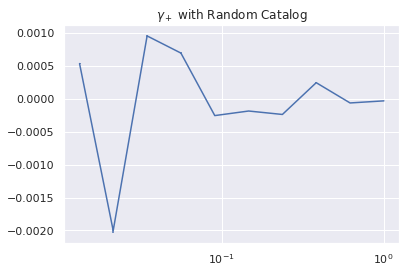

[ 5.3807e-04 -2.0032e-03  9.5860e-04  6.9755e-04 -2.5362e-04 -1.8407e-04
 -2.3639e-04  2.4706e-04 -6.1347e-05 -2.9438e-05]
[-8.3444e-06  3.1065e-05 -1.4866e-05 -1.0818e-05  3.9331e-06  2.8546e-06
  3.6659e-06 -3.8315e-06  9.5137e-07  4.5652e-07]


In [27]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

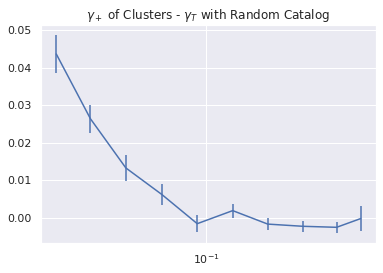

In [28]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

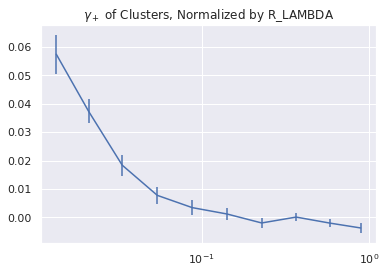

Aggregated xi:
[-14.6488 -27.5392 -23.4326 -15.2592 -11.2576  -6.4217  15.9906  -1.4087
  26.6903  30.4809]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1096.0165  -2840.6128  -4321.8326  -5717.7893  -7927.4485 -10300.2628
 -12124.0768 -11383.7815  -7131.4875   -954.4097]
------------------------------------------------------------------------------
Aggregated npairs:
[  255.   737.  1274.  1965.  3262.  5272.  8214. 11352. 13294.  8221.]
------------------------------------------------------------------------------
Mean xi:
[-0.0574 -0.0374 -0.0184 -0.0078 -0.0035 -0.0012  0.0019 -0.0001  0.002
  0.0037]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.2981 -3.8543 -3.3923 -2.9098 -2.4302 -1.9538 -1.476  -1.0028 -0.5364
 -0.1161]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [29]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)